## **Install the packages**

In [82]:
!pip install numpy
!pip install yfinance
!pip install pandas 
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Import the libraries**
Import all the libraries required - numpy to deal with arrays, yfinance to import data, pandas to dea with tabular data and matplotlib for visualisation.

In [83]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## **Implement on different market indices**

In [84]:
indices = ['^BSESN','^IXIC','IMOEX.ME']

# ^BSEBN - NSE & BSE SENSEX 
# ^IXIC - NASDAQ Composite
# IMOEX.ME - MOEX Russia Index

INDEX = ['NSE & BSE SENSEX','NASDAQ Composite','MOEX Russia Index']

## **Download the data**

In [85]:
def download_data(index):

  # Get the closing prices for the current index
  ticker = yf.Ticker(index)

  # Download the data
  df= ticker.history(period='6mo')

  # Return the data as a DataFrame
  return pd.DataFrame(df.iloc[:,:4])

# **KELTNER CHANNEL**
the Keltner Channel is a technical indicator that is often used by traders to identify volatility and the direction of the market. The Keltner Channel is composed of three components: The upper band, the lower band, and the middle line where :
*   Middle Line = 20-period exponential moving average of the closing price
*   Upper Band = Middle line + Multiplier * 10-period ATR
*   List item = Middle line - Multiplier * 10-period ATR

Here we use Multiplier = 2 



## **Calculate the ATR**
It is calculated in the following manner:


1.   True Range = MAX [ {HIGH - LOW}, {HIGH - Previous CLOSE}, {Previous CLOSE - LOW} ]
2.   Average True Range = 10-period smoothened EMA of True Range



In [86]:
# Make a function to calculate atr which takes two arguments as input - 
# one dataframe containing the price data and one atr lookback period

def find_atr(data,atr_period):
  
  # Calculate the three differences
  d1 = pd.DataFrame(data['High']-data['Low'])
  d2 = pd.DataFrame(abs(data['High']-data['Close'].shift(1)))
  d3 = pd.DataFrame(abs(data['Low']-data['Close'].shift(1)))

  # Combine them in one dataframe 
  combined_d = pd.concat([d1,d2,d3], axis=1, join = 'inner')

  # Find the max of three difference to get the true range
  true_range = combined_d.max(axis=1)

  # Find the average true range by taking the EMA of true range 
  # and using the smoothening factor alpha
  avg_true_range = true_range.ewm(alpha = 1/atr_period).mean()

  # Return the average true range calculated
  return avg_true_range

## **Calculate the Keltner Channel**

In [87]:
# Make a function to calculate the keltner channel which takes four arguments as inputs - 
# a dataframe containing the price data, one ketlner channel lookback period, one 
# atr lookback period and one multiplier. Here we use multiplier = 2

def find_kc(data, kc_period, atr_period, multiplier):

  # Calculate the middle line by using the 'ewm' function 
  middle = data['Close'].ewm(kc_period).mean()

  # Calculate the upper and lower bands using the formulas given above 
  upper = middle + (multiplier * find_atr(data, atr_period))
  lower = middle - (multiplier * find_atr(data, atr_period))

  # Return the middle, upper and lower bands
  return middle, upper, lower

## **Plot the curve**

In [88]:
# Make a function to plot the three line of the keltner channel which takes 
# two arguments as inputs - one dataframe containing the data required and the index name

def plot_kc(df1, idx_name):
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,15))
    fig.suptitle(idx_name,fontweight="bold")

    # Plot the closing prices
    axs[0].plot(df1['Close'],label='Close')
    axs[0].legend(loc='upper left')
    axs[0].grid()
    axs[1].plot(df1['Close'],label='Close')

    # Plot the upper band 
    axs[1].plot(df1['upper'],label='Upper Band', color = 'orange')

    # Plot the lower band 
    axs[1].plot(df1['lower'],label='Lower Band', color = 'orange')

    # Plot the middle line 
    axs[1].plot(df1['middle'],label='Lower Band', color = 'yellow', linestyle = '--')
    
    axs[1].legend(loc='upper left')
    axs[1].grid()


## **Call the functions to complete the task**

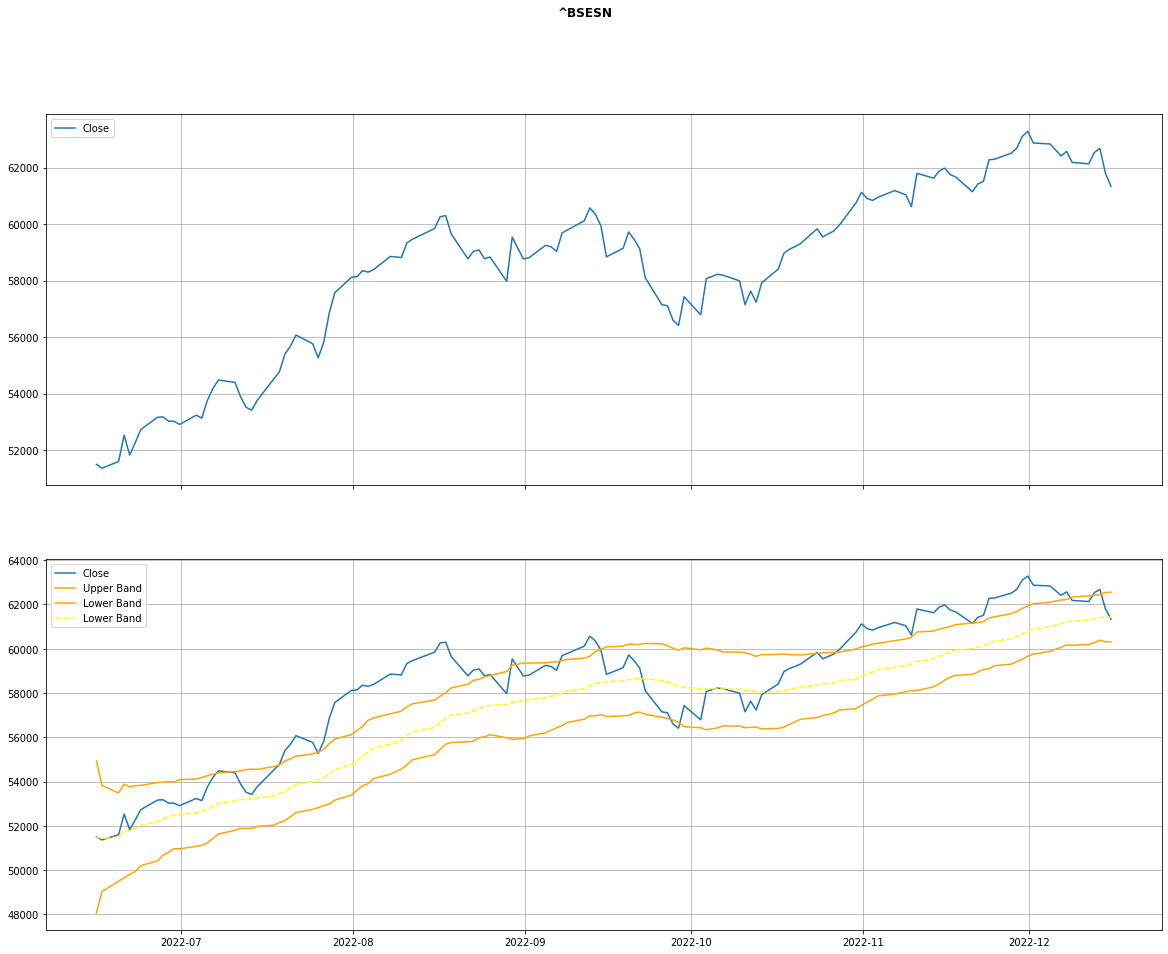

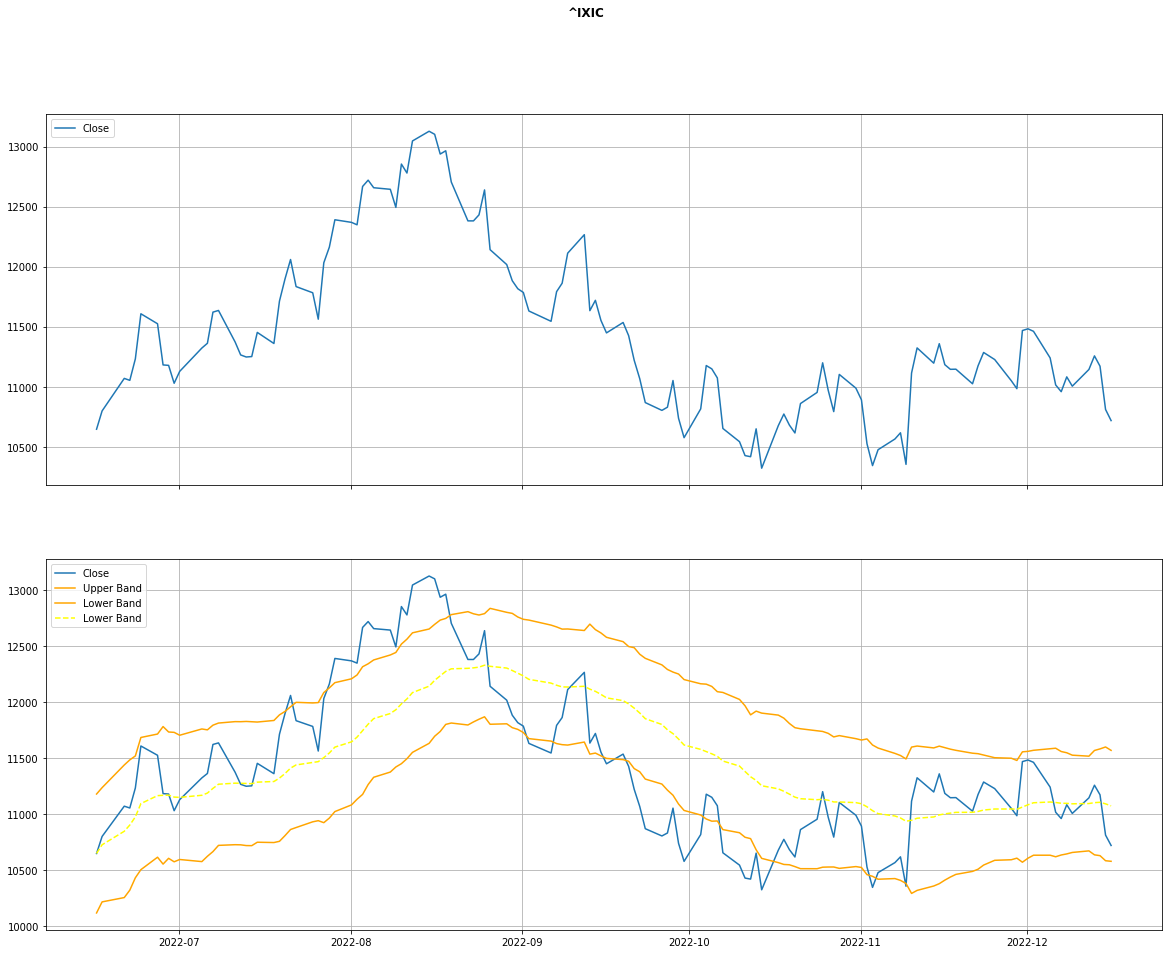

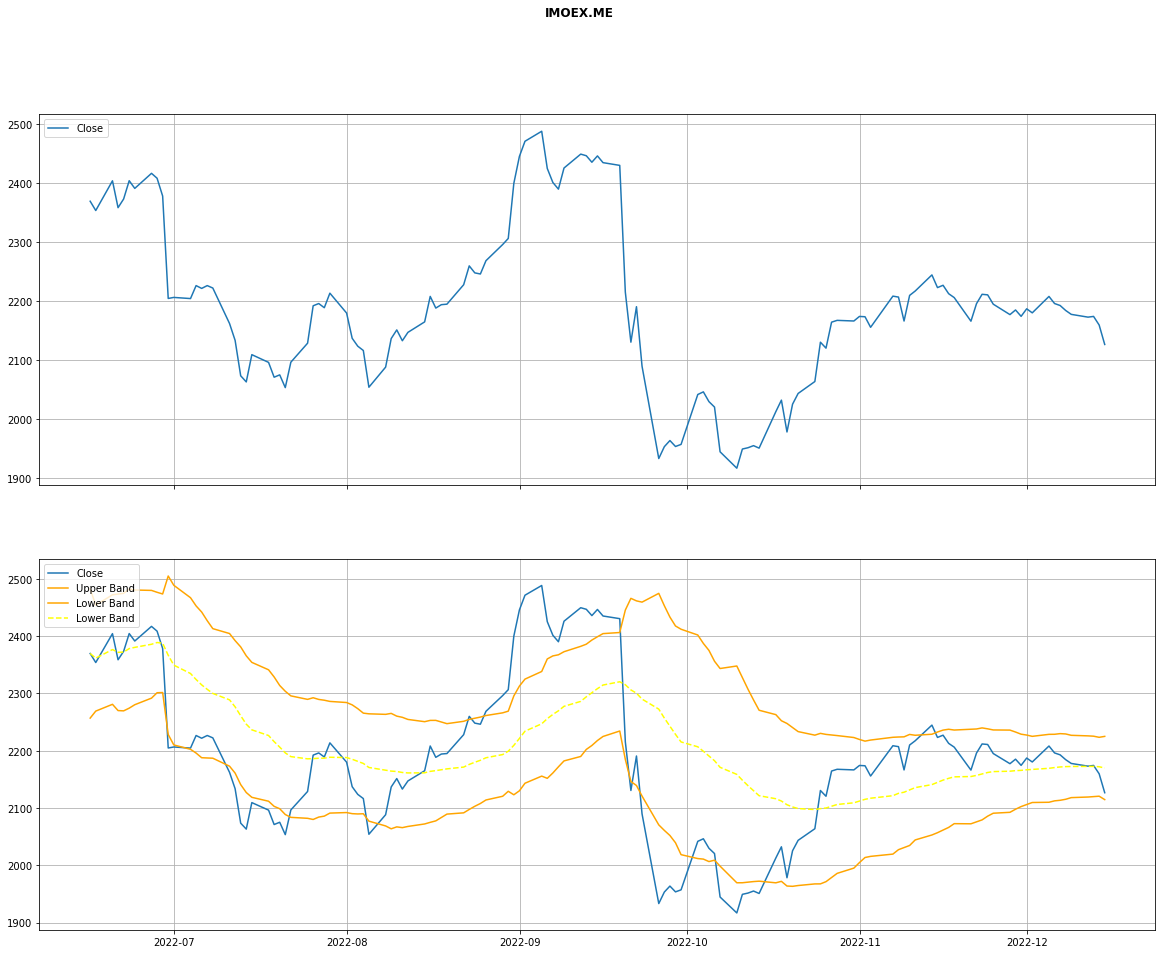

In [89]:
# Initialize a counter variable to zero
i=0

# Make a loop to download the data and plot the channel for all indices
for i in range(len(indices)):

  # Download the data
  data = download_data(indices[i])

  # Call the 'find_kc' function to get the three lines 
  data['middle'], data['upper'], data['lower'] = find_kc(data, 20, 10, 2)

  # Plot the keltner channel
  plot_kc(data,indices[i])

  # Increment the counter variable for the next index
  i=i+1